<a href="https://colab.research.google.com/github/ariana-caetano/data-engineering/blob/main/Exercicio_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Pandas - Marketing Campaign

Este exercício, realizado sobre os dados de uma campanha de marketing, foi utilizado para treinar as funcionalidades apreendidas durante o bootcamp de Engenharia de Dados:

* realização de importação de bibliotecas;
* extração de dados de um cloud storage;
* análise dos dados;
* tratamento dos dados;
* validação dos dados;
* limpeza dos dados;
* análise e visualização com filtros dos dados.




In [ ]:
pip install pandera

In [ ]:
import pandas as pd
import pandera as pa
from datetime import date

In [ ]:
pd.set_option('display.max_columns',30)

# Extração da base

In [ ]:
df_marketing = pd.read_csv('https://storage.googleapis.com/bc26-bucket-aulas/marketing_campaign.csv', sep=',', parse_dates=['Year_Birth','Dt_Customer'], dayfirst=True)

In [ ]:
df_marketing.shape

(2240, 29)

In [ ]:
df_marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Pré-análise

Checando os tipo dos dados de cada coluna

In [ ]:
df_marketing.dtypes

ID                              int64
Year_Birth             datetime64[ns]
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
df_marketing.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# df_marketing.groupby(['ID'],dropna=False).size()
# df_marketing.groupby(['Year_Birth'],dropna=False).size()
# df_marketing.groupby(['Education'],dropna=False).size()
# df_marketing.groupby(['Marital_Status'],dropna=False).size()
# df_marketing.groupby(['Income'],dropna=False).size()
# df_marketing.groupby(['Kidhome'],dropna=False).size()
# df_marketing.groupby(['Teenhome'],dropna=False).size()
# df_marketing.groupby(['Dt_Customer'],dropna=False).size()
# df_marketing.groupby(['Recency'],dropna=False).size()
# df_marketing.groupby(['MntWines'],dropna=False).size()
# df_marketing.groupby(['MntFruits'],dropna=False).size()
# df_marketing.groupby(['MntMeatProducts'],dropna=False).size()
# df_marketing.groupby(['MntFishProducts'],dropna=False).size()
# df_marketing.groupby(['MntSweetProducts'],dropna=False).size()
# df_marketing.groupby(['MntGoldProds'],dropna=False).size()
# df_marketing.groupby(['NumDealsPurchases'],dropna=False).size()
# df_marketing.groupby(['NumWebPurchases'],dropna=False).size()
# df_marketing.groupby(['NumCatalogPurchases'],dropna=False).size()
# df_marketing.groupby(['NumStorePurchases'],dropna=False).size()
# df_marketing.groupby(['NumWebVisitsMonth'],dropna=False).size()
# df_marketing.groupby(['AcceptedCmp3'],dropna=False).size()
# df_marketing.groupby(['AcceptedCmp4'],dropna=False).size()
# df_marketing.groupby(['AcceptedCmp5'],dropna=False).size()
# df_marketing.groupby(['AcceptedCmp1'],dropna=False).size()
# df_marketing.groupby(['AcceptedCmp2'],dropna=False).size()
# df_marketing.groupby(['Complain'],dropna=False).size()
# df_marketing.groupby(['Z_CostContact'],dropna=False).size()
# df_marketing.groupby(['Z_Revenue'],dropna=False).size()
# df_marketing.groupby(['Response'],dropna=False).size()


Income
1730.0       1
2447.0       1
3502.0       1
4023.0       1
4428.0       1
            ..
157733.0     1
160803.0     1
162397.0     1
666666.0     1
NaN         24
Length: 1975, dtype: int64

In [ ]:
filtronulo = df_marketing.Income.isna()
df_marketing.loc[filtronulo]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983-01-01,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986-01-01,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959-01-01,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951-01-01,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982-01-01,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973-01-01,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957-01-01,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957-01-01,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973-01-01,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961-01-01,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [ ]:
sorted(pd.unique(df_marketing.Income))

Em uma primeira visualização é possível perceber que temos dados relativos a alguma campanha de marketing realizada. Onde foram coletados: nível de escolaridade, estado civil, número de crianças e adolecentes em casa, a renda, dados de compras realizadas pela web/pelo catálogo/pela loja, valor gasto em alguns produtos vinho/carne/peixe/frutas/doce/ouro

E existem também algumas colunas preenchidas com 0 e 1, que podem siginificar um sim ou não, ou true ou false.

* ID - candidadto a index, pois não se repete no dataframe
* Year_Birth - 1893 (1),  1899 (1), 1900 (1)
* Education - 5 categorias
* Marital_Status - 8 categorias
* Income - NaN, existe um salário que parece não ser válido 666666.0

As colunas Year_Birth e Dt_Customer são datas e realizei a extração do dataframe novamente utilizando o parse:

```
parse_dates=['Year_Birth','Dt_Customer'], dayfirst=True
```



# Tratamento dos dados

### Tradução do dataframe

Antes de começar as mudanças, realização de um backup.

In [ ]:
#backup do dataframe
df_marketing_bkp = df_marketing

In [ ]:
df_marketing.rename(columns={
    'ID':'codigo_cliente',
    'Year_Birth':'ano_nascimento',
    'Education':'escolaridade',
    'Marital_Status':'estado_civil',
    'Income':'renda_anual',
    'Kidhome':'qtd_criancas',
    'Teenhome':'qtd_adolescentes',
    'Dt_Customer':'data_cadastro',
    'Recency':'ultima_compra',
    'MntWines':'gastos_vinhos',
    'MntFruits':'gastos_frutas',
    'MntMeatProducts':'gastos_carnes',
    'MntFishProducts':'gastos_pescados',
    'MntSweetProducts':'gastos_doces',
    'MntGoldProds':'gastos_ouro',
    'NumDealsPurchases':'qtd_compras_desconto',      
    'NumWebPurchases':'qtd_compras_site',          
    'NumCatalogPurchases':'qtd_compras_catalogo',      
    'NumStorePurchases':'qtd_compras_loja',        
    'NumWebVisitsMonth':'qtd_visualizacoes_site',        
    'AcceptedCmp3':'campanha3',             
    'AcceptedCmp4':'campanha4',             
    'AcceptedCmp5':'campanha5',             
    'AcceptedCmp1':'campanha1',             
    'AcceptedCmp2' :'campanha2',            
    'Complain':'reclamacoes',               
    'Z_CostContact':'custo_contatar_cliente',            
    'Z_Revenue':'receita_aceitar_campanha',                
    'Response':'aceitacao_ultima_campanha'                            
},inplace=True)

Traduzindo os dados de nível de escolaridade:

*Segundo informação pesquisada na internet: Como funciona a educação básica nos Estados Unidos?
Na parte primária, o ensino nos Estados Unidos começa na faixa etária de 6 anos. Depois, a escola secundária inicia até que esse ensino seja concluído, quando os estudantes já estão com 16 anos.*


* 2n Cycle: Pós Graduação (ou é mestrado?)
* Basic: Ensino Médio
* Graduation: Graduação
* Master: Mestrado
* PhD: Doutorado



Traduzindo o estado civil:

* **Absurd: não é um estado civil oficial**
* **Alone: não é um estado civil oficial**
* Divorced: Divorciado
* Married: Casado
* Single: Solteiro
* **Together: não é um estado civil oficial, talvez sejam pessoas que vivam em uma união estável.**
* Widow: Viúvo
* **YOLO: You only live once, não é um estado civil oficial**

Talvez fosse necessário investigar onde os dados são preenchidos, pois foram permitidas inserções de dados que não refletem exatamente dados reais.
Vamos imaginar aqui, que a recomendação seja trocar esses dados por Na (apenas 7 registros). 

E para a opção Together, vamos considerar como união estável.

Outro dado que parece apresentar uma inconsistência é a data de nascimento, existem 3 valores que podem não representar a realidade, pois poderia sugerir que o cliente tenha mais de 120 anos, o que é raríssimo. Não realizarei nenhuma mudança nesse dado, mas deixarei a observação e o cientista de dados ou analista pode tratar como um outlier ou até excluí-lo posteriormente, de acordo com a necessidade da sua análise.
**ano_nascimento - 1893 (1), 1899 (1), 1900 (1)**


In [ ]:
df_marketing.groupby(['escolaridade'],dropna=False).size()

escolaridade
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

#### Traduzindo a escolaridade

In [ ]:
df_marketing.escolaridade.replace(['2n Cycle'], 'Pós Graduação', inplace=True)

In [ ]:
df_marketing.escolaridade.replace(['Basic'], 'Ensino Médio', inplace=True)

In [ ]:
df_marketing.escolaridade.replace(['Graduation'], 'Graduação', inplace=True)

In [ ]:
df_marketing.escolaridade.replace(['Master'], 'Mestrado', inplace=True)

In [ ]:
df_marketing.escolaridade.replace(['PhD'], 'Doutorado', inplace=True)

In [ ]:
df_marketing.groupby(['escolaridade'],dropna=False).size()

escolaridade
Doutorado         486
Ensino Médio       54
Graduação        1127
Mestrado          370
Pós Graduação     203
dtype: int64

#### Traduzindo o estado civil

In [ ]:
df_marketing.groupby(['estado_civil'],dropna=False).size()

estado_civil
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

In [ ]:
df_marketing.estado_civil.replace(['Absurd'],pd.NA,inplace=True)

In [ ]:
df_marketing.estado_civil.replace(['Alone'],pd.NA,inplace=True)

In [ ]:
df_marketing.estado_civil.replace(['Divorced'], 'Divorciado', inplace=True)

In [ ]:
df_marketing.estado_civil.replace(['Married'], 'Casado', inplace=True)

In [ ]:
df_marketing.estado_civil.replace(['Single'], 'Solteiro', inplace=True)

In [ ]:
df_marketing.estado_civil.replace(['Together'], 'União estável', inplace=True)

In [ ]:
df_marketing.estado_civil.replace(['Widow'], 'Viúvo', inplace=True)

In [ ]:
df_marketing.estado_civil.replace(['YOLO'],pd.NA,inplace=True)

In [ ]:
df_marketing.groupby(['estado_civil'],dropna=False).size()

estado_civil
Casado           864
Divorciado       232
Solteiro         480
União estável    580
Viúvo             77
NaN                7
dtype: int64

##Validação de dados com Pandera

A biblioteca Pandera é utilizada para validar o schema de dados do dataframe.

In [ ]:
df_marketing.dtypes

codigo_cliente                        int64
ano_nascimento               datetime64[ns]
escolaridade                         object
estado_civil                         object
renda_anual                         float64
qtd_criancas                          int64
qtd_adolescentes                      int64
data_cadastro                datetime64[ns]
ultima_compra                         int64
gastos_vinhos                         int64
gastos_frutas                         int64
gastos_carnes                         int64
gastos_pescados                       int64
gastos_doces                          int64
gastos_ouro                           int64
qtd_compras_desconto                  int64
qtd_compras_site                      int64
qtd_compras_catalogo                  int64
qtd_compras_loja                      int64
qtd_visualizacoes_site                int64
campanha3                             int64
campanha4                             int64
campanha5                       

In [ ]:
# schema de validação dos dados

schema = pa.DataFrameSchema(
      columns = {
          'codigo_cliente': pa.Column(pa.Int),
          'ano_nascimento': pa.Column(pa.DateTime),
          'escolaridade': pa.Column(pa.String),
          'estado_civil': pa.Column(pa.String, nullable=True),
          'renda_anual': pa.Column(pa.Float, nullable=True),
          'qtd_criancas': pa.Column(pa.Int),
          'qtd_adolescentes': pa.Column(pa.Int),
          'data_cadastro': pa.Column(pa.DateTime),
          'ultima_compra': pa.Column(pa.Int),
          'gastos_vinhos': pa.Column(pa.Int),
          'gastos_frutas': pa.Column(pa.Int),
          'gastos_carnes': pa.Column(pa.Int),
          'gastos_pescados': pa.Column(pa.Int),
          'gastos_doces': pa.Column(pa.Int),
          'gastos_ouro': pa.Column(pa.Int),
          'qtd_compras_desconto': pa.Column(pa.Int),
          'qtd_compras_site': pa.Column(pa.Int),
          'qtd_compras_catalogo': pa.Column(pa.Int),
          'qtd_compras_loja': pa.Column(pa.Int),
          'qtd_visualizacoes_site': pa.Column(pa.Int),
          'campanha3': pa.Column(pa.Int),
          'campanha4': pa.Column(pa.Int),
          'campanha5': pa.Column(pa.Int),
          'campanha1': pa.Column(pa.Int),
          'campanha2': pa.Column(pa.Int),
          'reclamacoes': pa.Column(pa.Int),
          'custo_contatar_cliente': pa.Column(pa.Int),
          'receita_aceitar_campanha': pa.Column(pa.Int),
          'aceitacao_ultima_campanha': pa.Column(pa.Int)
      }
  )

In [ ]:
#validador do DF
schema.validate(df_marketing)

,codigo_cliente,ano_nascimento,escolaridade,estado_civil,renda_anual,qtd_criancas,qtd_adolescentes,data_cadastro,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha
0,5524,1957-01-01,Graduação,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduação,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduação,União estável,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduação,União estável,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,Doutorado,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduação,Casado,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946-01-01,Doutorado,União estável,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981-01-01,Graduação,Divorciado,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956-01-01,Mestrado,União estável,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Filtros - Análise dos dados

In [ ]:
#um novo backup com os dados tratados
df_tratado = df_marketing.copy()

In [ ]:
df_marketing.head(10)

,codigo_cliente,ano_nascimento,escolaridade,estado_civil,renda_anual,qtd_criancas,qtd_adolescentes,data_cadastro,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha
0,5524,1957-01-01,Graduação,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduação,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduação,União estável,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduação,União estável,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,Doutorado,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967-01-01,Mestrado,União estável,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971-01-01,Graduação,Divorciado,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985-01-01,Doutorado,Casado,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974-01-01,Doutorado,União estável,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950-01-01,Doutorado,União estável,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


#### Dados estatísticos do dataframe

In [ ]:
#exibe alguns dados estatíticos das colunas numéricas
df_marketing.describe()

,codigo_cliente,renda_anual,qtd_criancas,qtd_adolescentes,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Dados estatísticos dos solteiros

In [ ]:
#filtro dos solteiros
filtro_solteiro = df_marketing.estado_civil == 'Solteiro'
df_solteiro = df_marketing.loc[filtro_solteiro]

# dados estatíticos dos solteiros
df_solteiro.describe()

,codigo_cliente,renda_anual,qtd_criancas,qtd_adolescentes,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha
count,480.000000,471.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.0,480.000000
mean,5489.241667,50995.350318,0.464583,0.406250,49.506250,288.331250,26.835417,182.108333,38.216667,27.262500,43.729167,2.131250,3.872917,2.600000,5.639583,5.283333,0.079167,0.068750,0.064583,0.064583,0.010417,0.012500,3.0,11.0,0.220833
std,3259.472823,22229.542143,0.543318,0.532417,28.632871,333.111329,40.479485,243.333137,55.047512,41.910455,52.026266,1.762952,2.951680,2.779736,3.254882,2.560119,0.270280,0.253293,0.246046,0.246046,0.101635,0.111218,0.0,0.0,0.415241
min,1.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2801.750000,33558.000000,0.000000,0.000000,26.000000,20.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5210.500000,48904.000000,0.000000,0.000000,51.000000,153.500000,9.000000,65.000000,12.000000,9.000000,26.000000,1.000000,3.000000,2.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8319.750000,68959.000000,1.000000,1.000000,75.000000,480.750000,32.250000,260.750000,52.500000,36.000000,52.000000,3.000000,5.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11187.000000,113734.000000,2.000000,2.000000,99.000000,1332.000000,199.000000,984.000000,250.000000,263.000000,362.000000,15.000000,27.000000,11.000000,13.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Dados estatísticos dos casados e união estável

Vou  olhar os casados e divorciados juntos, pois tem um estado civil que é bem similar.

In [ ]:
#filtro dos casados
filtro_casado = (df_marketing.estado_civil == 'Casado') | (df_marketing.estado_civil == 'União estável')
df_casado = df_marketing.loc[filtro_casado]

# dados estatíticos dos casados
df_casado.describe()

,codigo_cliente,renda_anual,qtd_criancas,qtd_adolescentes,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha
count,1444.000000,1430.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.0,1444.0,1444.000000
mean,5637.780471,52334.264336,0.453601,0.518698,49.012465,302.430748,25.580332,163.662742,36.831025,26.468837,42.891967,2.364958,4.085180,2.645429,5.804709,5.322715,0.069252,0.073407,0.076177,0.065789,0.013158,0.009003,3.0,11.0,0.109418
std,3243.258885,27004.409609,0.541993,0.546199,29.146175,336.515811,39.014450,225.891149,54.033464,40.511881,51.434604,1.988300,2.690365,2.991842,3.240737,2.377653,0.253970,0.260894,0.265373,0.248000,0.113990,0.094488,0.0,0.0,0.312271
min,0.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2834.750000,35032.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5528.000000,51650.500000,0.000000,0.000000,49.000000,175.500000,8.000000,66.000000,12.000000,8.000000,22.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8465.250000,68274.000000,1.000000,1.000000,74.000000,492.250000,32.000000,221.250000,47.500000,31.250000,55.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11188.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,258.000000,197.000000,321.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Dados estatísticos dos divorciados

In [ ]:
#filtro dos divorciados
filtro_divorciado = df_marketing.estado_civil == 'Divorciado'
df_divorciados = df_marketing.loc[filtro_divorciado]

# dados estatíticos dos divorciados
df_divorciados.describe()

,codigo_cliente,renda_anual,qtd_criancas,qtd_adolescentes,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.0,232.000000
mean,5427.060345,52834.228448,0.413793,0.590517,49.487069,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793,2.435345,4.310345,2.672414,5.818966,5.487069,0.086207,0.077586,0.056034,0.051724,0.021552,0.008621,3.0,11.0,0.206897
std,3177.802231,21239.759765,0.527495,0.542956,28.728612,347.097304,40.196743,187.092519,52.361281,41.282807,54.571834,1.928405,2.915591,2.793858,3.326658,2.460037,0.281276,0.268098,0.230486,0.221948,0.145528,0.092646,0.0,0.0,0.405957
min,22.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2880.000000,36948.000000,0.000000,0.000000,25.750000,23.000000,2.000000,14.750000,3.000000,2.000000,10.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5324.500000,52683.000000,0.000000,1.000000,51.000000,182.500000,7.500000,71.500000,10.000000,7.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8056.250000,68758.500000,1.000000,1.000000,75.250000,565.750000,35.000000,216.250000,42.750000,33.250000,59.500000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,153924.000000,2.000000,2.000000,99.000000,1459.000000,172.000000,932.000000,225.000000,189.000000,242.000000,15.000000,11.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Comparação entre a venda dos produtos

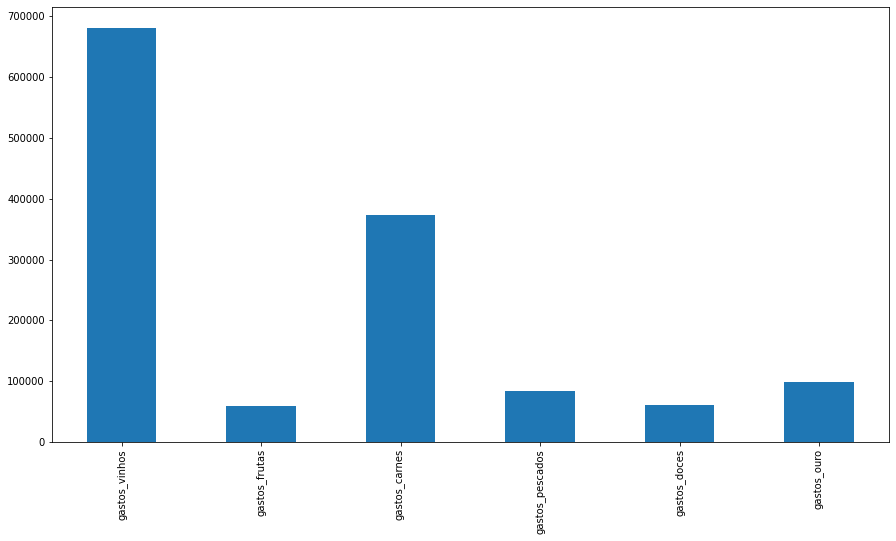

In [ ]:
#comparação entre as vendas dos produtos
df_marketing[['gastos_vinhos',	'gastos_frutas',	'gastos_carnes',	'gastos_pescados',	'gastos_doces',	'gastos_ouro']].sum().plot.bar(figsize=(15,8))


#### Quantidade de clientes por grau de escolaridade

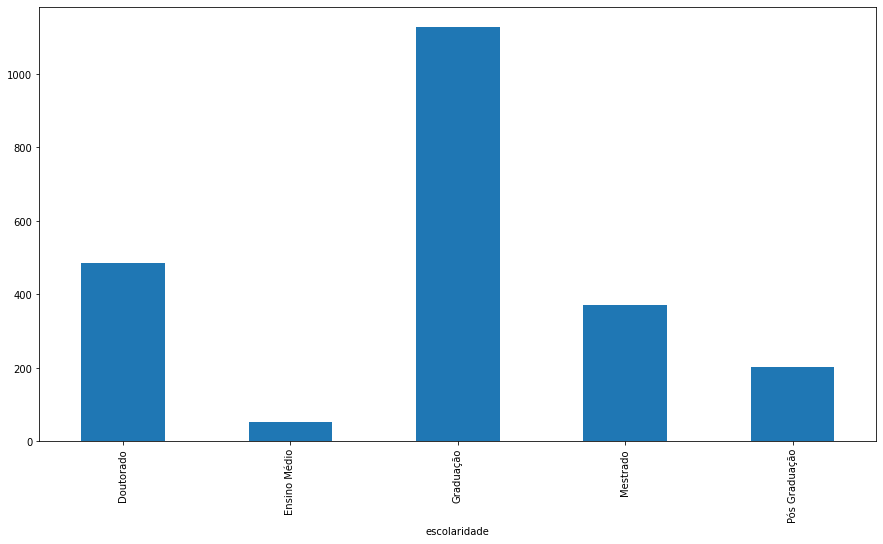

In [ ]:
df_marketing.groupby(['escolaridade'],dropna=False).size().plot.bar(figsize=(15,8))

#### Quantidade de clientes por estado civil

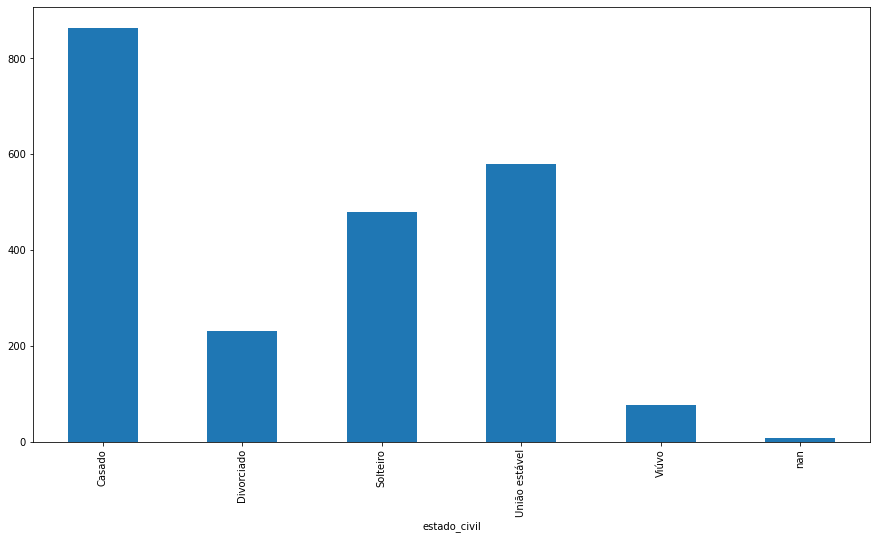

In [ ]:
df_marketing.groupby(['estado_civil'],dropna=False).size().plot.bar(figsize=(15,8))

#### Quantidade de venda por canal

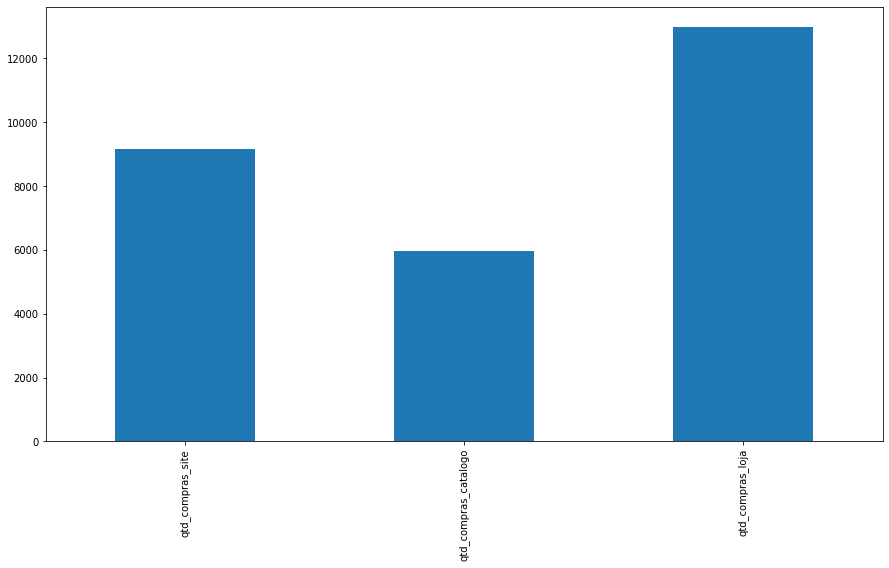

In [ ]:
df_marketing[['qtd_compras_site',	'qtd_compras_catalogo',	'qtd_compras_loja']].sum().plot.bar(figsize=(15,8))

#### Produtos mais vendidos por escolaridade

In [ ]:
df_marketing[['escolaridade', 'gastos_vinhos',	'gastos_frutas',	'gastos_carnes',	'gastos_pescados',	'gastos_doces',	'gastos_ouro']].groupby('escolaridade').sum().plot.bar(figsize=(15,8))

#### Campanha com mais adesão



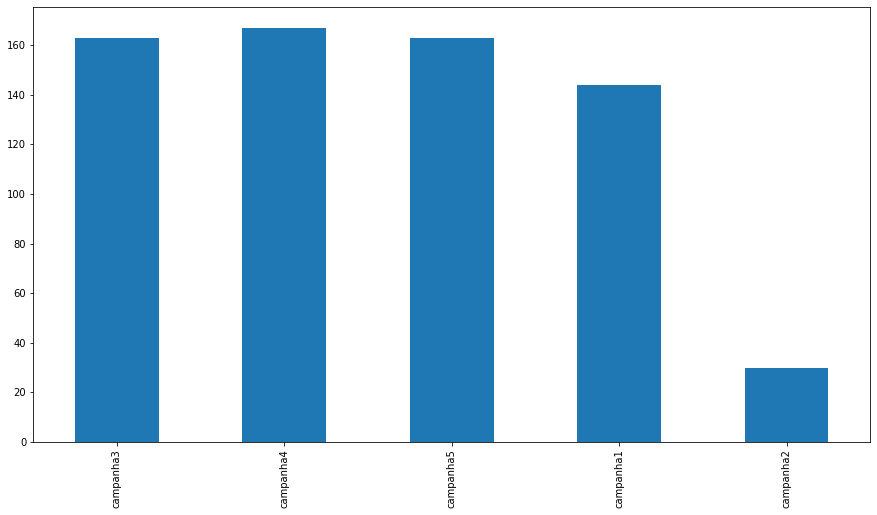

In [ ]:
df_marketing[['campanha3', 'campanha4',	'campanha5',	'campanha1',	'campanha2']].sum().plot.bar(figsize=(15,8))


Produtos mais vendidos por estado civil

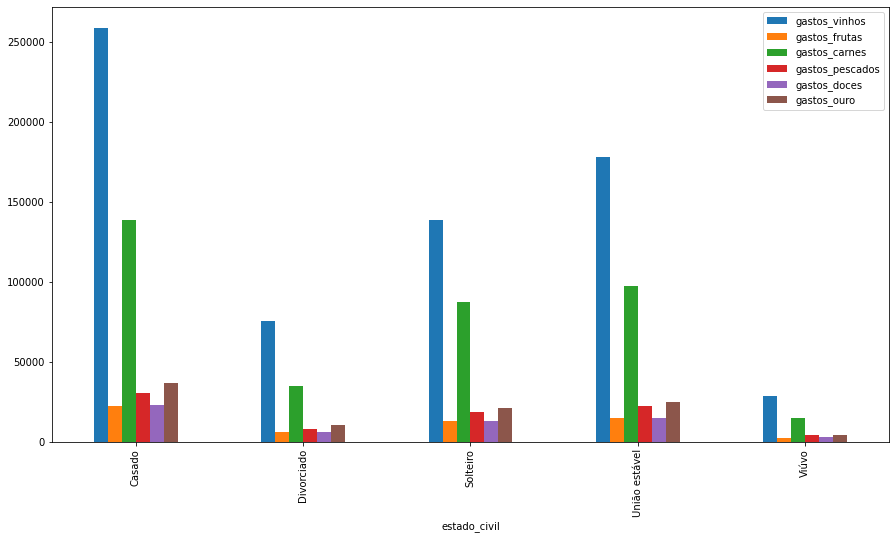

In [ ]:
df_marketing[['estado_civil', 'gastos_vinhos',	'gastos_frutas',	'gastos_carnes',	'gastos_pescados',	'gastos_doces',	'gastos_ouro']].groupby('estado_civil').sum().plot.bar(figsize=(15,8))

#### Idade dos clientes

In [ ]:
data_hoje= date.today()

df_marketing['idade'] = data_hoje.year - df_marketing.ano_nascimento.dt.year
df_marketing.head(10)

,codigo_cliente,ano_nascimento,escolaridade,estado_civil,renda_anual,qtd_criancas,qtd_adolescentes,data_cadastro,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha,idade
0,5524,1957-01-01,Graduação,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65
1,2174,1954-01-01,Graduação,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68
2,4141,1965-01-01,Graduação,União estável,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57
3,6182,1984-01-01,Graduação,União estável,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38
4,5324,1981-01-01,Doutorado,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41
5,7446,1967-01-01,Mestrado,União estável,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,55
6,965,1971-01-01,Graduação,Divorciado,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,51
7,6177,1985-01-01,Doutorado,Casado,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,37
8,4855,1974-01-01,Doutorado,União estável,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,48
9,5899,1950-01-01,Doutorado,União estável,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,72


In [ ]:
#média de idade
df_marketing['idade'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: idade, dtype: float64

# Limpeza de dados

Após realizar algumas análises nos dados percebi que as colunas custo_contatar_cliente e receita_aceitar_campanha são preenchidas por um valor único, 3 e 11, respectivamente. Não apresentam nenhuma informação relevante e por isso serão deletadas.

As colunas qtd_criancas	e qtd_adolescentes representam o número de filhos que o cliente possui e podem ser agrupadas em uma única coluna (qtd_filhos).

Durante minha análise criei uma coluna idade que também será deletada do dataframe final

In [ ]:
df_marketing['qtd_filhos'] = df_marketing['qtd_criancas'] + df_marketing['qtd_adolescentes']
df_marketing.head(5)

,codigo_cliente,ano_nascimento,escolaridade,estado_civil,renda_anual,qtd_criancas,qtd_adolescentes,data_cadastro,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,...,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contatar_cliente,receita_aceitar_campanha,aceitacao_ultima_campanha,idade,qtd_filhos
0,5524,1957-01-01,Graduação,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,...,8,10,4,7,0,0,0,0,0,0,3,11,1,65,0
1,2174,1954-01-01,Graduação,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,...,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2
2,4141,1965-01-01,Graduação,União estável,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,...,8,2,10,4,0,0,0,0,0,0,3,11,0,57,0
3,6182,1984-01-01,Graduação,União estável,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,...,2,0,4,6,0,0,0,0,0,0,3,11,0,38,1
4,5324,1981-01-01,Doutorado,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,...,5,3,6,5,0,0,0,0,0,0,3,11,0,41,1


In [ ]:
#Drop de colunas que não serão utilizadas
df_marketing.drop(['qtd_criancas','qtd_adolescentes','custo_contatar_cliente','receita_aceitar_campanha','idade'],axis=1,inplace=True)

In [ ]:
df_marketing.head(5)

,codigo_cliente,ano_nascimento,escolaridade,estado_civil,renda_anual,data_cadastro,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,aceitacao_ultima_campanha,qtd_filhos
0,5524,1957-01-01,Graduação,Solteiro,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0
1,2174,1954-01-01,Graduação,Solteiro,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2
2,4141,1965-01-01,Graduação,União estável,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984-01-01,Graduação,União estável,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1
4,5324,1981-01-01,Doutorado,Casado,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1


In [ ]:
df_final = df_marketing.copy()

##Validação de dados 2

In [ ]:
df_final.dtypes

codigo_cliente                        int64
ano_nascimento               datetime64[ns]
escolaridade                         object
estado_civil                         object
renda_anual                         float64
data_cadastro                datetime64[ns]
ultima_compra                         int64
gastos_vinhos                         int64
gastos_frutas                         int64
gastos_carnes                         int64
gastos_pescados                       int64
gastos_doces                          int64
gastos_ouro                           int64
qtd_compras_desconto                  int64
qtd_compras_site                      int64
qtd_compras_catalogo                  int64
qtd_compras_loja                      int64
qtd_visualizacoes_site                int64
campanha3                             int64
campanha4                             int64
campanha5                             int64
campanha1                             int64
campanha2                       

In [ ]:
# schema de validação dos dados

schema2 = pa.DataFrameSchema(
      columns = {
          'codigo_cliente': pa.Column(pa.Int),
          'ano_nascimento': pa.Column(pa.DateTime),
          'escolaridade': pa.Column(pa.String),
          'estado_civil': pa.Column(pa.String, nullable=True),
          'renda_anual': pa.Column(pa.Float, nullable=True),
          'data_cadastro': pa.Column(pa.DateTime),
          'ultima_compra': pa.Column(pa.Int),
          'gastos_vinhos': pa.Column(pa.Int),
          'gastos_frutas': pa.Column(pa.Int),
          'gastos_carnes': pa.Column(pa.Int),
          'gastos_pescados': pa.Column(pa.Int),
          'gastos_doces': pa.Column(pa.Int),
          'gastos_ouro': pa.Column(pa.Int),
          'qtd_compras_desconto': pa.Column(pa.Int),
          'qtd_compras_site': pa.Column(pa.Int),
          'qtd_compras_catalogo': pa.Column(pa.Int),
          'qtd_compras_loja': pa.Column(pa.Int),
          'qtd_visualizacoes_site': pa.Column(pa.Int),
          'campanha3': pa.Column(pa.Int),
          'campanha4': pa.Column(pa.Int),
          'campanha5': pa.Column(pa.Int),
          'campanha1': pa.Column(pa.Int),
          'campanha2': pa.Column(pa.Int),
          'reclamacoes': pa.Column(pa.Int),
          'aceitacao_ultima_campanha': pa.Column(pa.Int)
      }
  )

In [ ]:
#validador do DF
schema2.validate(df_final)

,codigo_cliente,ano_nascimento,escolaridade,estado_civil,renda_anual,data_cadastro,ultima_compra,gastos_vinhos,gastos_frutas,gastos_carnes,gastos_pescados,gastos_doces,gastos_ouro,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_loja,qtd_visualizacoes_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,aceitacao_ultima_campanha,qtd_filhos
0,5524,1957-01-01,Graduação,Solteiro,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0
1,2174,1954-01-01,Graduação,Solteiro,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2
2,4141,1965-01-01,Graduação,União estável,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984-01-01,Graduação,União estável,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1
4,5324,1981-01-01,Doutorado,Casado,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduação,Casado,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1
2236,4001,1946-01-01,Doutorado,União estável,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,3
2237,7270,1981-01-01,Graduação,Divorciado,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0
2238,8235,1956-01-01,Mestrado,União estável,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1


# Salvar dataframe finalizado

In [ ]:
df_final.to_csv('marketing_campaign_final.csv', index=False)